### Email Phishing - Data2

In [2]:
import pandas as cloudEmail_pns
import warnings as cloudEmail_wns
cloudEmail_wns.filterwarnings('ignore')
import matplotlib.pyplot as cloudEmail_mpt
from wordcloud import WordCloud as cloudEmail_wrdcld
import regex as cloudEmail_rex
import nltk as cloudEmail_ntk
cloudEmail_ntk.download('stopwords')
from nltk.corpus import stopwords as cloudEmail_swrd
phishWord = cloudEmail_swrd.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
cloudEmail2 = cloudEmail_pns.read_csv('CEAS_08.csv')
cloudEmail2

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [4]:
cloudEmail2['body'][:5]

,body
0,"Buck up, your troubles caused by small dimensi..."
1,\nUpgrade your sex and pleasures with these te...
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...
3,Would anyone object to removing .so from this ...
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...


In [5]:
cloudEmail2['label'].value_counts()

,count
label,
1,21842
0,17312


In [6]:
cloudEmail2.info()  ##---- Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [7]:
cloudEmail2= cloudEmail2.drop(['sender','receiver','date','subject','urls'], axis=1)
cloudEmail2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    39154 non-null  object
 1   label   39154 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 611.9+ KB


In [8]:
cloudEmail2.isnull().sum()  ##---- Missing Values for each column

,0
body,0
label,0


In [9]:
cloudEmail2.duplicated().sum()  ##---- Duplicate values

0

In [10]:
cloudEmail2

,body,label
0,"Buck up, your troubles caused by small dimensi...",1
1,\nUpgrade your sex and pleasures with these te...,1
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1
3,Would anyone object to removing .so from this ...,0
4,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1
...,...,...
39149,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1
39150,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1
39151,Hello there ! \nGreat work on the slide show v...,0
39152,"\nMail from sender , coming from intuit.com\ns...",0


In [11]:
def prep_email(clem):
    cldPhish = clem.lower()
    cldPhish = cloudEmail_rex.sub(r'http://www+', '', cldPhish)
    cldPhish = cloudEmail_rex.sub("[^a-z]+", " ", cldPhish)
    cldPhish = " ".join([cldwrd for cldwrd in cldPhish.split() if cldwrd not in phishWord])
    return cldPhish

cldLst = []
for cld in cloudEmail2['body']:
    cldLst.append(prep_email(cld))
cloudEmail2['body'] = cldLst
cloudEmail2


,body,label
0,buck troubles caused small dimension soon beco...,1
1,upgrade sex pleasures techniques brightmade com,1
2,daily top cnn com top videos stories aug pm ed...,1
3,would anyone object removing list tld basicall...,0
4,welcomefastshippingcustomersupport http iwfna ...,1
...,...,...
39149,cnn alerts custom alert alert name custom aler...,1
39150,cnn alerts custom alert alert name custom aler...,1
39151,hello great work slide show viewer application...,0
39152,mail sender coming intuit com servers subject ...,0


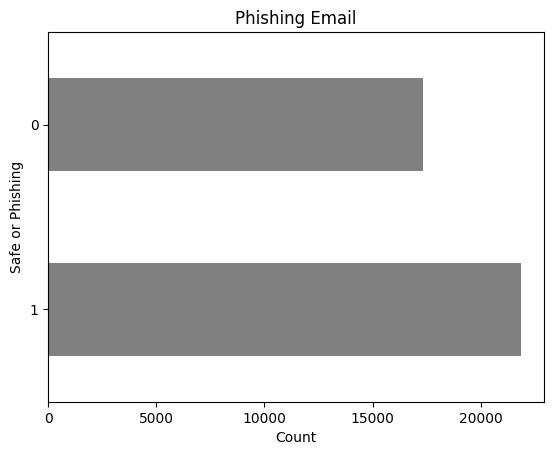

In [12]:
cloudEmail2['label'].value_counts().plot(kind='barh', color='grey')
cloudEmail_mpt.title('Phishing Email')
cloudEmail_mpt.xlabel('Count')
cloudEmail_mpt.ylabel('Safe or Phishing')
cloudEmail_mpt.show()


0 = Phishing Email and 1 = Safe Emails

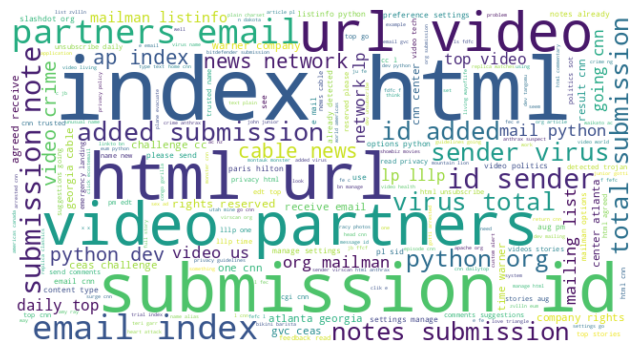

In [13]:
cld_wrdTxt = " ".join(cloudEmail2["body"])

# Generating word cloud for "text_combined"
word_cloud = cloudEmail_wrdcld(width=650, height=350, background_color="white").generate(cld_wrdTxt)

cloudEmail_mpt.figure(figsize=(8, 5))
cloudEmail_mpt.imshow(word_cloud, interpolation='bilinear')
cloudEmail_mpt.axis("off")
cloudEmail_mpt.show()

In [14]:
cloudEmail2.to_csv('Research_data2.csv', index=False)
cloudEmail2

,body,label
0,buck troubles caused small dimension soon beco...,1
1,upgrade sex pleasures techniques brightmade com,1
2,daily top cnn com top videos stories aug pm ed...,1
3,would anyone object removing list tld basicall...,0
4,welcomefastshippingcustomersupport http iwfna ...,1
...,...,...
39149,cnn alerts custom alert alert name custom aler...,1
39150,cnn alerts custom alert alert name custom aler...,1
39151,hello great work slide show viewer application...,0
39152,mail sender coming intuit com servers subject ...,0
